TranAD: Deep Transformer Networks for Anomaly Detection in Multivariate Time Series Data

### Problem Formulation
サイズ T の観測/データポイントのタイムスタンプ付きシーケンスである多変量時系列を検討します

$$
T=\{x_1,\cdots,x_T\}
$$

ここで、各データポイント 𝑥𝑡 は特定のタイムスタンプ 𝑡 および 𝑥𝑡 ∈ IR𝑚, ∀𝑡 で収集されます。 ここで、単変量設定は、𝑚 = 1 の特定のケースです。ここで、異常検出と診断の 2 つの問題を定義します。
異常検出: トレーニング入力時系列 T が与えられた場合、長さ 𝑇ˆ の目に見えないテスト時系列 Tˆ とトレーニング シリーズと同じモダリティについて、Y = {𝑦1, . . . ここで、𝑦𝑡 ∈ {0, 1} を使用して、テスト セットの 𝑡 番目のタイムスタンプのデータポイントが異常かどうかを示します (1 は異常なデータポイントを示します)。
異常診断: 上記のトレーニングとテストの時系列を考えると、Y = {𝑦1, . . . , 𝑦𝑇ˆ }, ここで 𝑦𝑡 ∈ {0, 1} 𝑚 は、𝑡 番目のタイムスタンプでのデータポイントのどのモードが異常であるかを示します。

### Data Preprocessing
o モデルをより堅牢にします。トレーニングとテストの両方のために、データを正規化し、時系列ウィンドウに変換します。 時系列を次のように正規化します。

$$
x_t←\frac{x_t-\min (\tau)}{\max(\tau)-\min(\tau)+\epsilon'}
$$

ここで、min(T ) と max(T ) は、トレーニング時系列のモードごとの最小ベクトルと最大ベクトルです。 𝜖' はゼロ除算を防ぐための小さな定数ベクトルです。 アプリオリに範囲を知っているので、データを正規化して $[0, 1)$の範囲に収めます。
タイムスタンプ 𝑡 でのデータ ポイント 𝑥𝑡 の依存関係をモデル化するために、長さ 𝐾 のローカル コンテキスト ウィンドウを次のように考えます。

$$
W_t=\{x_{t-K+1}, \cdots, x_t\}
$$

𝑡 < 𝐾 のレプリケーション パディングを使用し、入力時系列 T を一連のスライディング ウィンドウ W={𝑊1, . . . 、𝑊𝑇}。 𝑡 < 𝐾ごとに複製パディングは、ウィンドウ 𝑊𝑡 に定数ベクトル {𝑥𝑡, . . . , 𝑥𝑡 } の長さ 𝐾 −𝑡 を使用して、各 𝑡 のウィンドウの長さ 𝐾 を維持します。 T をトレーニング入力として使用する代わりに、モデルのトレーニングに W を使用し、テスト シリーズとして W^(T^ に対応) を使用します。 これは、スタンドアロンのベクトルの代わりにローカル コンテキストを使用してデータポイントを与えることができるため、以前の研究 [4, 45] では一般的な方法であり、モデルで使用されています。 また、シリーズ T の現在のタイムスタンプ 𝑡 までのタイム スライスを考慮し、それを 𝐶𝑡 と表します。
ここで、各入力ウィンドウ 𝑊𝑡 の異常ラベル 𝑦𝑡 を直接予測する代わりに、まずこのウィンドウの異常スコア 𝑠𝑡 を予測します。 過去の入力ウィンドウの異常スコアを使用して、しきい値 𝐷 を計算し、それを超えると入力ウィンドウを異常としてラベル付けします。
したがって、𝑦𝑡 = 1(𝑠𝑡 ≥ 𝐷) です。 異常スコア𝑠𝑡を計算するには、入力ウィンドウを𝑂𝑡として再構築し、𝑊𝑡と𝑂𝑡の間の偏差を使用します。 簡単にするために、また一般性を失うことなく、以降の説明では 𝑊 、 𝐶 、 𝑂 、 𝑠 を使用します。

### Transformer Model

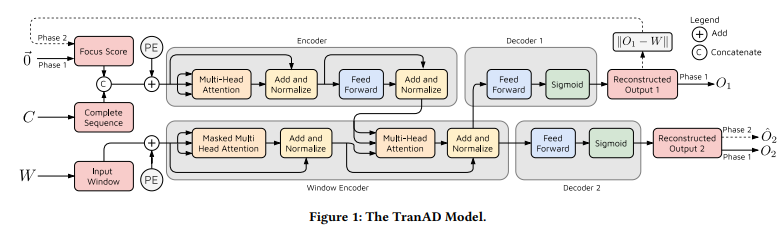

トランスフォーマーは、さまざまな自然言語や視覚で使用されている人気のある深層学習モデルです
処理タスク [51]。 ただし、時系列データの異常検出のタスクには、Transformer アーキテクチャの洞察に満ちたリファクタリングを使用します。 他のエンコーダー/デコーダー モデルと同様に、トランスフォーマーでは、入力シーケンスは複数のアテンション ベースの変換を受けます。 図 1 は、TranAD で使用されるニューラル ネットワークのアーキテクチャを示しています。 エンコーダーは、現在のタイムスタンプ 𝐶 までの完全なシーケンスをフォーカス スコアと共にエンコードします (詳細は後述)。 ウィンドウ エンコーダーはこれを使用して入力ウィンドウ 𝑊 のエンコードされた表現を作成し、それを 2 つのデコーダーに渡して再構成を作成します。

現在、TranAD の動作に関する詳細を提供しています。 𝑊 や 𝐶 のような多変量シーケンスは、最初にモダリティ 𝑚 を持つ行列形式に変換されます。 3 つの行列 𝑄 (クエリ)、𝐾 (キー)、および 𝑉 (値) のスケーリングされたドット積の注意 [51] を定義します。

ここで、MultiHeadAtt(𝐼1, 𝐼1, 𝐼1) は、入力行列 𝐼1 に対するマルチヘッド自己注意操作を表し、+ は行列加算を表します。上記の操作は、入力時系列ウィンドウと完全なシーケンスを使用してアテンション ウェイトを生成し、入力シーケンス内の一時的な傾向をキャプチャします。これらの操作により、各タイムスタンプでニューラル ネットワークが前のタイムスタンプの出力に依存しないため、モデルは時系列ウィンドウの複数のバッチを並行して推論でき、提案された方法のトレーニング時間が大幅に改善されます。ウィンドウ エンコーダーでは、入力ウィンドウ 𝑊 に位置エンコードを適用して 𝐼2 を取得します。ウィンドウエンコーダーの自己注意を変更して、後続の位置でデータをマスクします。これは、並列トレーニングを可能にするためにすべてのデータ 𝑊 および 𝐶 が一度に与えられるため、トレーニング時にデコーダーが将来のタイムスタンプ値のデータポイントを参照するのを防ぐために行われます。ウィンドウエンコーダーは次の操作を実行します